## Money

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [2]:
# Percentiles of net worth, from 1st percentile to 99th percentile.
# From: http://wealthometer.org/US/data.html
wealth_percentiles = [
    -31888, -17879, -11099, -7729, -5461, -3794, -2753, -1690, -1109, -564, -176, 0, 0, 32, 203,
    430, 655, 849, 1063, 1346, 1547, 1784, 2073, 2329, 2600, 2949, 3225, 3564, 3917, 4355, 4850,
    5551, 6103, 6554, 7046, 7645, 8258, 8913, 9893, 10765, 11750, 12545, 13743, 14966, 16013,
    17378, 18453, 20209, 21532, 22832, 24319, 25887, 27384, 28895, 30387, 32530, 34787, 36695,
    38693, 41459, 44809, 47902, 51632, 54793, 58220, 62330, 66243, 69602, 73245, 78469, 83657,
    89478, 95814, 102371, 110170, 116615, 124613, 132943, 141056, 151244, 161780, 173156, 189176,
    206512, 221557, 244762, 268966, 293184, 320617, 361415, 411628, 461311, 526219, 606727, 741520,
    917033, 1161447, 1633264, 2734475,
]

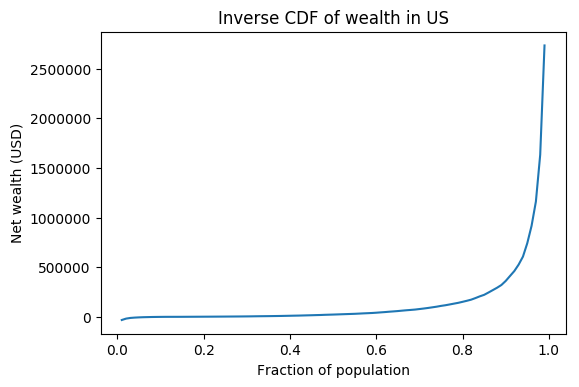

In [3]:
matplotlib.rcParams["figure.dpi"] = 100
plt.title("Inverse CDF of wealth in US")
plt.ylabel("Net wealth (USD)")
plt.xlabel("Fraction of population")
_ = plt.plot(np.linspace(0.01, 0.99, len(wealth_percentiles)), wealth_percentiles)

In [4]:
def compute_cdf(value):
    for i, amount in enumerate(wealth_percentiles[:-1]):
        next_amount = wealth_percentiles[i+1]
        if amount <= value < next_amount:
            # Linearly interpolate between this percentile and the next.
            slope = next_amount - amount
            # Add one because wealth_percentiles[0] is the first percentile of wealth.
            return (value - amount) / slope + i + 1

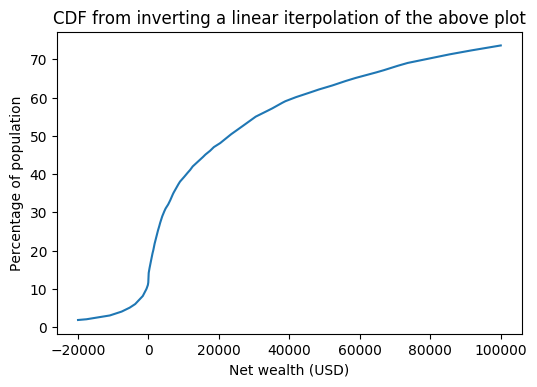

In [5]:
dollar_amounts = np.linspace(-20e3, 100e3, 1000)
plt.title("CDF from inverting a linear iterpolation of the above plot")
plt.ylabel("Percentage of population")
plt.xlabel("Net wealth (USD)")
_ = plt.plot(dollar_amounts, map(compute_cdf, dollar_amounts))

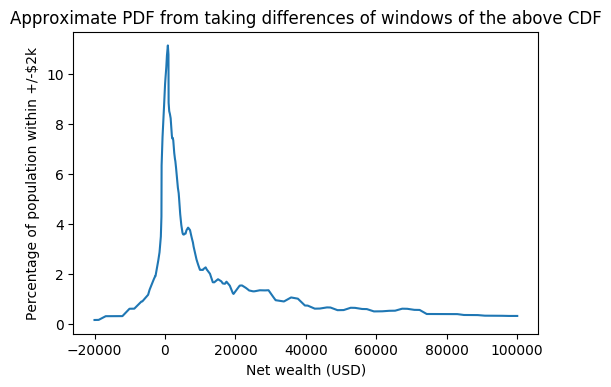

In [6]:
dollar_amounts = np.linspace(-20e3, 100e3, 10000)
window_width = 2e3
ys = [
    compute_cdf(i + window_width / 2) - compute_cdf(i - window_width / 2)
    for i in dollar_amounts
]
plt.title("Approximate PDF from taking differences of windows of the above CDF")
plt.ylabel("Percentage of population within +/-$2k")
plt.xlabel("Net wealth (USD)")
_ = plt.plot(dollar_amounts, ys)